In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

## Data loading

In [2]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Data Cleaning

In [3]:
df1.shape

(13320, 9)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df1.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


### Drop Some columns:

In [6]:
df2 = df1.drop(["area_type","availability","balcony","society"],axis=1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

### size column processing:

In [9]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
df3["BHK"] = df3["size"].apply(lambda x: int(x.split(" ")[0]))

C:\Users\rahul\AppData\Local\Temp\ipykernel_7344\242018705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["BHK"] = df3["size"].apply(lambda x: int(x.split(" ")[0]))


In [11]:
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


<Axes: xlabel='BHK'>

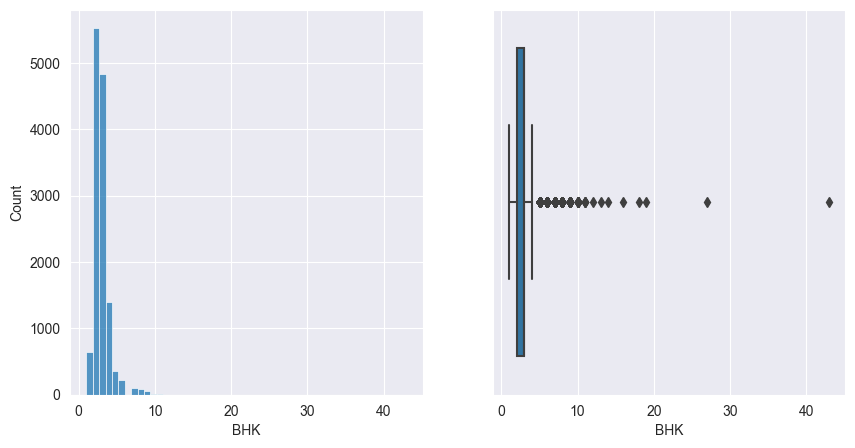

In [12]:
## some plot for outlier detection: 
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sns.histplot(data=df3,x="BHK",bins=50)
plt.subplot(1,2,2)
sns.boxplot(data=df3,x ="BHK")

### total_sqft column processing:

In [13]:
# a function to check:
def is_float(x):
    try :
        float(x)
    except:
        return False
    return True

In [14]:
df3[~df3["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [15]:
# format the total_sqft:
def generate_mean(x):
    numbers = x.split("-")
    if len(numbers) == 2:
        return (float(numbers[0])+float(numbers[1]))/2
    try:
        return float(x)
    except:
        return None

In [16]:
df3["total_sqft"] = df3["total_sqft"].apply(generate_mean)
df3.dropna(inplace=True)

C:\Users\rahul\AppData\Local\Temp\ipykernel_7344\34702769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["total_sqft"] = df3["total_sqft"].apply(generate_mean)
C:\Users\rahul\AppData\Local\Temp\ipykernel_7344\34702769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.dropna(inplace=True)


In [17]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
BHK           0
dtype: int64

Text(0.5, 1.0, 'BoxPlot')

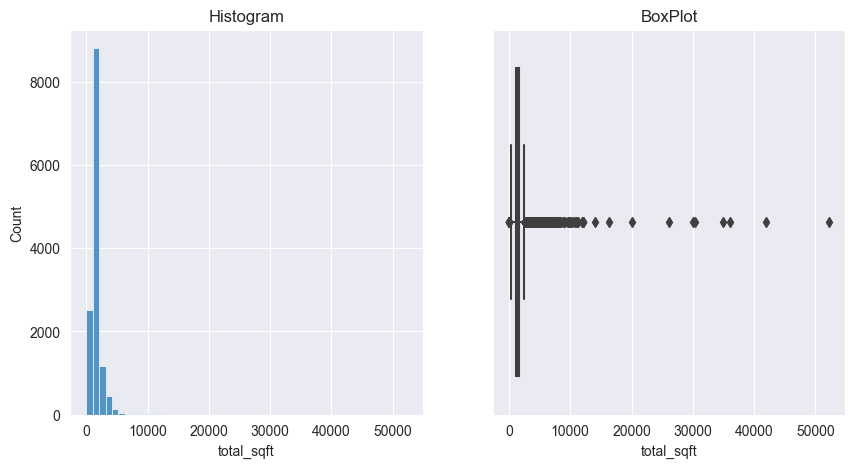

In [18]:
## some plot for outlier detection: 
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
p = sns.histplot(data=df3,x="total_sqft",bins=50)
p.set_title("Histogram")
plt.subplot(1,2,2)
p = sns.boxplot(data=df3,x ="total_sqft")
p.set_title("BoxPlot")

## Feature Engineering:

### location column processing:

In [19]:
df3.location.unique().shape

(1298,)

In [20]:
threshold1 = 10
loaction_count = df3.groupby("location")["location"].count().sort_values(ascending = False)
loaction_count_threshold = loaction_count[loaction_count<=threshold1]

In [21]:
df3.location = df3.location.apply(lambda x: "others" if x in loaction_count_threshold else x.strip() )

C:\Users\rahul\AppData\Local\Temp\ipykernel_7344\1269548264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.location = df3.location.apply(lambda x: "others" if x in loaction_count_threshold else x.strip() )


In [22]:
df3.location.unique().shape

(241,)

In [23]:
df3.head(10)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,others,6 Bedroom,1020.0,6.0,370.00,6


### Price_per_sqft

In [24]:
df3["price_per_sqft"] = df3.price/df3.total_sqft*100000

C:\Users\rahul\AppData\Local\Temp\ipykernel_7344\958065809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["price_per_sqft"] = df3.price/df3.total_sqft*100000


In [25]:
df3.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


## Outlier Removal:

### total_sqft per BHK

In [26]:
total_sqft_per_BHK = (df3.total_sqft/df3.BHK)
total_sqft_per_BHK.describe()

count    13200.000000
mean       573.847262
std        388.079980
min          0.250000
25%        473.000000
50%        552.000000
75%        625.000000
max      26136.000000
dtype: float64

In [27]:
threshold2 = 300
df4 = df3[~((df3.total_sqft/df3.BHK) < threshold2)]

In [28]:
df4.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [29]:
df4.shape

(12456, 7)

### Price per sqft:

<Axes: xlabel='price_per_sqft', ylabel='Count'>

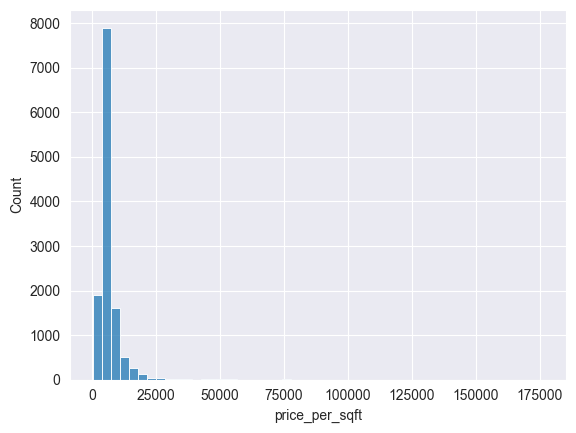

In [30]:
sns.histplot(data=df4,x="price_per_sqft",bins=50)

In [31]:
df4.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

**Assumption**:
* The price_per_sqft follows a normal distribution.
* The 1 std distance from mean point in both side contains 68% data points.

In [32]:
mean = df4.price_per_sqft.mean()
std = df4.price_per_sqft.std()
df5 = df4[(df4.price_per_sqft >= (mean-std)) & (df4.price_per_sqft <= (mean+std))]
df5.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


<Axes: xlabel='price_per_sqft', ylabel='Count'>

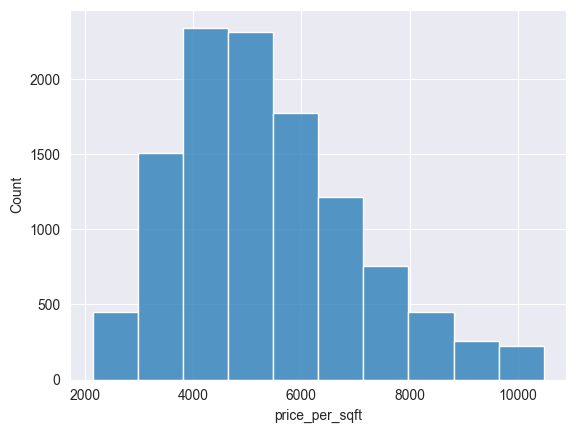

In [33]:
sns.histplot(data=df5,x="price_per_sqft",bins=10)

### At any location the total_sqft and price comparison:

In [34]:
def plot_scatter_chart(df,location):
    n_df = df[(df.location == location)]# & (df.area_type == area_type)]
    sns.scatterplot(data=n_df,x="total_sqft",y="price",hue="BHK",palette="coolwarm")
    plt.show()

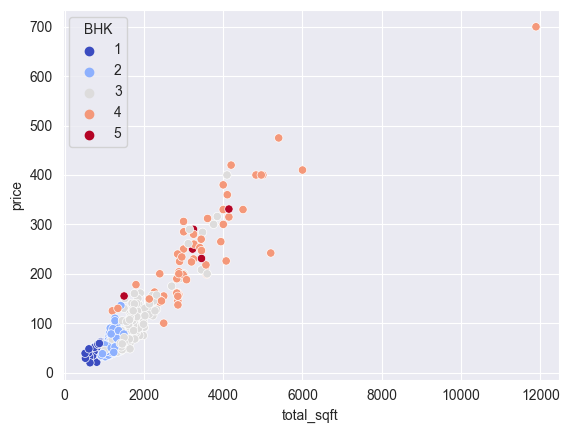

In [35]:
plot_scatter_chart(df5,"Whitefield")

In [36]:
def remove_bhk_outliers(df:pd.DataFrame()):
    exclude_indices = np.array([])
    
    count_df = df5.groupby(["location","BHK"])[["price_per_sqft"]].count()
    mean_df = df5.groupby(["location","BHK"])[["price_per_sqft"]].mean()
    std_df = df5.groupby(["location","BHK"])[["price_per_sqft"]].std()
    
    for location ,location_df in df.groupby("location"):
        stats = {}
        for bhk,bhk_df in location_df.groupby("BHK"):
            try: 
                stats = {
                    "mean": mean_df.loc[location,bhk-1].values,
                    "count": count_df.loc[location,bhk-1].values,
                    "std": std_df.loc[location,bhk-1].values
                }
            except :
                stats = None
            if stats and stats["count"] > 5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft < stats["mean"][0]].index.values)
    return df.drop(exclude_indices,axis=0)

In [37]:
df6 = remove_bhk_outliers(df5)

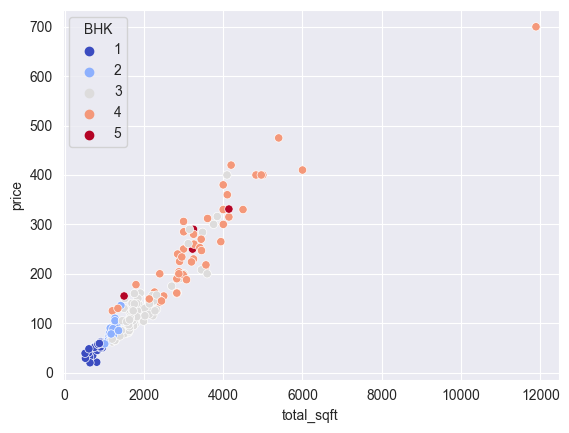

In [38]:
plot_scatter_chart(df6,"Whitefield")

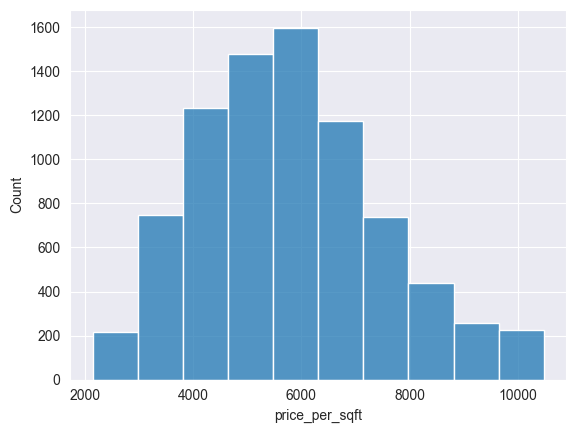

In [39]:
sns.histplot(data=df6,x="price_per_sqft",bins=10)
plt.show()

In [68]:
df7 = df6.drop(["size","price_per_sqft"],axis=1)

In [69]:
df7.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
6,Old Airport Road,2732.0,4.0,204.00,4


### Modelling:

In [70]:
dummies = pd.get_dummies(data=df7.location,dtype=int).drop("others",axis=1)

In [71]:
df8 = pd.concat([df7,dummies],axis=1)
df8.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Electronic City Phase II,1056.0,2.0,39.07,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,1440.0,2.0,62.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,1521.0,3.0,95.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,1200.0,2.0,51.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Old Airport Road,2732.0,4.0,204.00,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
df9 = df8.drop("location",axis=1)
df9.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2732.0,4.0,204.00,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
# feature and label distinguise:
X_df = df9.drop("price",axis=1)
X = X_df.values

y_df = df9["price"]
y = y_df.values

print(f"Shape of the X is {X.shape}, and y is {y.shape}")

Shape of the X is (8117, 242), and y is (8117,)


#### Train test split:

In [97]:
from sklearn.model_selection import train_test_split,ShuffleSplit,GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Model:

In [98]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train,y_train)
print(f"The model accuracy is {linear.score(X_test,y_test)}")

The model accuracy is 0.9129883641228899


In [99]:
cv = ShuffleSplit(n_splits=5,test_size=0.3,random_state=0)
config = {
    'model': LinearRegression(),
    'params':{
        'fit_intercept':[True,False],
        'positive':[True,False]
    }
}

score = {
    "models":[],
    "best_params":[],
    "best_accs":[],
    "best_estimators":[]
}

gridsearch = GridSearchCV(estimator=config['model'],param_grid=config['params'],cv=cv,verbose=3)
gridsearch.fit(X,y)
score["models"].append("Linear")
score["best_params"].append(gridsearch.best_params_)
score["best_accs"].append(gridsearch.best_score_)
score["best_estimators"].append(gridsearch.best_estimator_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .fit_intercept=True, positive=True;, score=0.826 total time=   0.2s
[CV 2/5] END .fit_intercept=True, positive=True;, score=0.858 total time=   0.2s
[CV 3/5] END .fit_intercept=True, positive=True;, score=0.875 total time=   0.2s
[CV 4/5] END .fit_intercept=True, positive=True;, score=0.848 total time=   0.2s
[CV 5/5] END .fit_intercept=True, positive=True;, score=0.834 total time=   0.2s
[CV 1/5] END fit_intercept=True, positive=False;, score=0.838 total time=   0.1s
[CV 2/5] END fit_intercept=True, positive=False;, score=0.865 total time=   0.1s
[CV 3/5] END fit_intercept=True, positive=False;, score=0.882 total time=   0.2s
[CV 4/5] END fit_intercept=True, positive=False;, score=0.860 total time=   0.2s
[CV 5/5] END fit_intercept=True, positive=False;, score=0.851 total time=   0.1s
[CV 1/5] END fit_intercept=False, positive=True;, score=0.800 total time=   0.1s
[CV 2/5] END fit_intercept=False, positive=True;,

### Lasso Model:

In [100]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)
print(f"The model accuracy is {lasso.score(X_test,y_test)}")

The model accuracy is 0.8903854332391099


In [101]:
cv = ShuffleSplit(n_splits=5,test_size=0.3,random_state=0)
config = {
    'model': Lasso(),
    'params':{
        'alpha' :[1.0,2.0],
        'selection' : ['cyclic', 'random']
    }
}

gridsearch = GridSearchCV(estimator=config['model'],param_grid=config['params'],cv=cv,verbose=3)
gridsearch.fit(X,y)
score["models"].append("Lasso")
score["best_params"].append(gridsearch.best_params_)
score["best_accs"].append(gridsearch.best_score_)
score["best_estimators"].append(gridsearch.best_estimator_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .......alpha=1.0, selection=cyclic;, score=0.808 total time=   0.0s
[CV 2/5] END .......alpha=1.0, selection=cyclic;, score=0.846 total time=   0.0s
[CV 3/5] END .......alpha=1.0, selection=cyclic;, score=0.855 total time=   0.0s
[CV 4/5] END .......alpha=1.0, selection=cyclic;, score=0.832 total time=   0.0s
[CV 5/5] END .......alpha=1.0, selection=cyclic;, score=0.817 total time=   0.0s
[CV 1/5] END .......alpha=1.0, selection=random;, score=0.808 total time=   0.0s
[CV 2/5] END .......alpha=1.0, selection=random;, score=0.846 total time=   0.0s
[CV 3/5] END .......alpha=1.0, selection=random;, score=0.855 total time=   0.0s
[CV 4/5] END .......alpha=1.0, selection=random;, score=0.832 total time=   0.0s
[CV 5/5] END .......alpha=1.0, selection=random;, score=0.817 total time=   0.0s
[CV 1/5] END .......alpha=2.0, selection=cyclic;, score=0.808 total time=   0.0s
[CV 2/5] END .......alpha=2.0, selection=cyclic;,

### Ridge model:

In [102]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train,y_train)
print(f"The model accuracy is {ridge.score(X_test,y_test)}")

The model accuracy is 0.9141870500282653


In [103]:
cv = ShuffleSplit(n_splits=5,test_size=0.3,random_state=0)
config = {
    'model': Ridge(),
    'params':{
        'alpha' :[1.0,2.0],
        'solver' : ['auto', 'svd', 'cholesky', 'lsqr']
    }
}

gridsearch = GridSearchCV(estimator=config['model'],param_grid=config['params'],cv=cv,verbose=3)
gridsearch.fit(X,y)
score["models"].append("Ridge")
score["best_params"].append(gridsearch.best_params_)
score["best_accs"].append(gridsearch.best_score_)
score["best_estimators"].append(gridsearch.best_estimator_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ............alpha=1.0, solver=auto;, score=0.840 total time=   0.0s
[CV 2/5] END ............alpha=1.0, solver=auto;, score=0.868 total time=   0.0s
[CV 3/5] END ............alpha=1.0, solver=auto;, score=0.882 total time=   0.0s
[CV 4/5] END ............alpha=1.0, solver=auto;, score=0.861 total time=   0.0s
[CV 5/5] END ............alpha=1.0, solver=auto;, score=0.852 total time=   0.0s
[CV 1/5] END .............alpha=1.0, solver=svd;, score=0.840 total time=   0.2s
[CV 2/5] END .............alpha=1.0, solver=svd;, score=0.868 total time=   0.2s
[CV 3/5] END .............alpha=1.0, solver=svd;, score=0.882 total time=   0.2s
[CV 4/5] END .............alpha=1.0, solver=svd;, score=0.861 total time=   0.3s
[CV 5/5] END .............alpha=1.0, solver=svd;, score=0.852 total time=   0.3s
[CV 1/5] END ........alpha=1.0, solver=cholesky;, score=0.840 total time=   0.0s
[CV 2/5] END ........alpha=1.0, solver=cholesky;,

In [104]:
score

{'models': ['Linear', 'Lasso', 'Ridge'],
 'best_params': [{'fit_intercept': True, 'positive': False},
  {'alpha': 2.0, 'selection': 'random'},
  {'alpha': 2.0, 'solver': 'svd'}],
 'best_accs': [0.859392234096074, 0.8324774664381941, 0.8608277606520621],
 'best_estimators': [LinearRegression(),
  Lasso(alpha=2.0, selection='random'),
  Ridge(alpha=2.0, solver='svd')]}

### Decision Tree Model:

In [105]:
from sklearn.tree import DecisionTreeRegressor
d_tree = DecisionTreeRegressor()
d_tree.fit(X_train,y_train)
print(f"The model accuracy is {d_tree.score(X_test,y_test)}")

The model accuracy is 0.6761783941742822


In [106]:
cv = ShuffleSplit(n_splits=5,test_size=0.3,random_state=0)
config = {
    'model': DecisionTreeRegressor(),
    'params':{
        'criterion' : ["squared_error", "friedman_mse", "absolute_error"],
        'max_depth' : [1,10,None],
        'max_leaf_nodes' : [1,10,None]
    }
}

gridsearch = GridSearchCV(estimator=config['model'],param_grid=config['params'],cv=cv,verbose=3)
gridsearch.fit(X,y)
score["models"].append("Decision Tree")
score["best_params"].append(gridsearch.best_params_)
score["best_accs"].append(gridsearch.best_score_)
score["best_estimators"].append(gridsearch.best_estimator_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END criterion=squared_error, max_depth=1, max_leaf_nodes=1;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=1, max_leaf_nodes=1;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=1, max_leaf_nodes=1;, score=nan total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=1, max_leaf_nodes=1;, score=nan total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=1, max_leaf_nodes=1;, score=nan total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=1, max_leaf_nodes=10;, score=0.537 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=1, max_leaf_nodes=10;, score=0.501 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=1, max_leaf_nodes=10;, score=0.425 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=1, max_leaf_nodes=10;, score=0.540 total time=   0.0s
[CV 5/5] END criterion=squared_erro

[CV 1/5] END criterion=friedman_mse, max_depth=None, max_leaf_nodes=10;, score=0.597 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=None, max_leaf_nodes=10;, score=0.802 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=None, max_leaf_nodes=10;, score=0.745 total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=None, max_leaf_nodes=10;, score=0.814 total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=None, max_leaf_nodes=10;, score=0.793 total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=None, max_leaf_nodes=None;, score=0.563 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=None, max_leaf_nodes=None;, score=0.785 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=None, max_leaf_nodes=None;, score=0.746 total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=None, max_leaf_nodes=None;, score=0.798 total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=None, max

C:\Users\rahul\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rahul\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rahul\anaconda3\envs\tf\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\rahul\anaconda3\envs\tf\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\rahul\anaconda3\envs\tf\

In [107]:
score_df = pd.DataFrame(data=score)
score_df

,models,best_params,best_accs,best_estimators
0,Linear,"{'fit_intercept': True, 'positive': False}",0.859392,LinearRegression()
1,Lasso,"{'alpha': 2.0, 'selection': 'random'}",0.832477,"Lasso(alpha=2.0, selection='random')"
2,Ridge,"{'alpha': 2.0, 'solver': 'svd'}",0.860828,"Ridge(alpha=2.0, solver='svd')"
3,Decision Tree,"{'criterion': 'friedman_mse', 'max_depth': 10,...",0.817386,DecisionTreeRegressor(criterion='friedman_mse'...


<Axes: xlabel='models', ylabel='best_accs'>

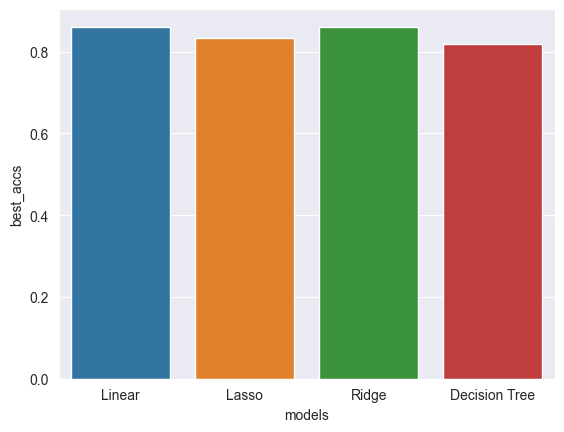

In [115]:
sns.barplot(data=score_df,x="models",y="best_accs")

In [116]:
best_model = score_df[score_df.best_accs == score_df.best_accs.max()]['best_estimators'].values[0]

In [117]:
def predict_price(location,total_sqft,bath,bhk):
    loc_index = np.where(X_df.columns == location)[0][0]
    
    x = np.zeros_like(X_df.columns)
    x[0] = total_sqft
    x[1] = bath
    x[2] = bhk
    
    x[loc_index] = 1
    return best_model.predict([x])[0] 

In [161]:
predict_price(location='Indira Nagar',total_sqft=1000,bath=3,bhk=3)

86.99937073687562

In [162]:
import pickle 
with open("banglore_home_prices_model.pickle",'wb') as f:
    pickle.dump(best_model,f) 

In [164]:
import json 
columns = {
    'data_columns': [col.lower() for col in X_df.columns]
}
with open("columns.json",'w') as f:
    f.write(json.dumps(columns))